In [1]:
import numpy as np
import random
import torch
from torch import nn, optim
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
import cifar10_model_bn as cifar10_model_bn
model_file="cifar10_model_bn.pt"
epochs=100
patience = 3
best_loss = float('inf')
counter = 0
# end_loss=0.65

In [3]:
torch.manual_seed(10)
np.random.seed(10)
random.seed(10)

In [4]:
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # 隨機裁剪圖像
    transforms.RandomHorizontalFlip(),     # 隨機水平翻轉圖像
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616))
])

In [5]:
train_data=datasets.CIFAR10('data/cifar10/train',train=True,download=True,transform=transform)
print(train_data.data.shape)

Files already downloaded and verified
(50000, 32, 32, 3)


In [6]:
dev_size=0.2
idx=list(range(len(train_data)))
np.random.shuffle(idx)
split_size=int(np.floor(dev_size*len(train_data)))
train_idx, dev_idx=idx[split_size:], idx[:split_size]
train_sampler=SubsetRandomSampler(train_idx)
dev_sampler=SubsetRandomSampler(dev_idx)

In [7]:
batch_size=1000
train_loader= DataLoader(train_data,batch_size=batch_size,sampler=train_sampler)
dev_loader= DataLoader(train_data,batch_size=batch_size,sampler=dev_sampler)
print(len(train_loader),len(dev_loader))

40 10


In [8]:
data_batch,label_batch=next(iter(train_loader))
print(data_batch.size(),label_batch.size())

torch.Size([1000, 3, 32, 32]) torch.Size([1000])


In [9]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"deivce:{device}")

deivce:cuda


In [10]:
model=cifar10_model_bn.CNN().to(device)

In [11]:
loss_function = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

In [12]:
train_losses=[]
dev_losses=[]
x_axis=[]

for epoch in range(epochs+1):
    train_loss=0
    # 訓練資料
    model.train()
    for data,target in tqdm(train_loader):        
        data=data.to(device)
        target=target.to(device)
        
        pred=model(data)
        loss=loss_function(pred,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()

    train_loss=train_loss/len(train_loader)
    
    x_axis.append(epoch)
    with torch.no_grad():
        dev_loss=0
        # 驗證資料
        model.eval()
        for data_dev,target_dev in tqdm(dev_loader):               
            data_dev=data_dev.to(device)
            target_dev=target_dev.to(device)

            dev_pred=model(data_dev)
            loss2=loss_function(dev_pred,target_dev)
            dev_loss += loss2.item()

        dev_loss=dev_loss/len(dev_loader)

    train_losses.append(train_loss)
    dev_losses.append(dev_loss)

    print(f"epoch: {epoch}, Train_loss: {train_loss:.3f}, Valid_loss: {dev_loss:.3f}, lr: {scheduler.get_last_lr()}")
    
    scheduler.step()
    
    if dev_loss < best_loss:
        best_loss = dev_loss
        best_epoch = epoch
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print('Early stopping at epoch', epoch)
            break

100%|██████████| 10/10 [00:02<00:00,  4.29it/s]


epoch: 0, Train_loss: 1.714, Valid_loss: 1.413, lr: [0.001]


100%|██████████| 10/10 [00:02<00:00,  4.25it/s]


epoch: 1, Train_loss: 1.305, Valid_loss: 1.129, lr: [0.0009997532801828658]


100%|██████████| 10/10 [00:02<00:00,  4.08it/s]


epoch: 2, Train_loss: 1.109, Valid_loss: 1.022, lr: [0.0009990133642141358]


100%|██████████| 10/10 [00:02<00:00,  4.15it/s]


epoch: 3, Train_loss: 0.983, Valid_loss: 0.892, lr: [0.00099778098230154]


100%|██████████| 10/10 [00:02<00:00,  4.20it/s]


epoch: 4, Train_loss: 0.897, Valid_loss: 0.811, lr: [0.000996057350657239]


100%|██████████| 10/10 [00:02<00:00,  4.27it/s]


epoch: 5, Train_loss: 0.830, Valid_loss: 0.769, lr: [0.0009938441702975688]


100%|██████████| 10/10 [00:02<00:00,  4.29it/s]


epoch: 6, Train_loss: 0.772, Valid_loss: 0.721, lr: [0.0009911436253643444]


100%|██████████| 10/10 [00:02<00:00,  4.23it/s]


epoch: 7, Train_loss: 0.728, Valid_loss: 0.683, lr: [0.0009879583809693736]


100%|██████████| 10/10 [00:02<00:00,  4.19it/s]


epoch: 8, Train_loss: 0.705, Valid_loss: 0.676, lr: [0.0009842915805643154]


100%|██████████| 10/10 [00:02<00:00,  4.24it/s]


epoch: 9, Train_loss: 0.670, Valid_loss: 0.631, lr: [0.0009801468428384714]


100%|██████████| 10/10 [00:02<00:00,  4.13it/s]


epoch: 10, Train_loss: 0.652, Valid_loss: 0.624, lr: [0.0009755282581475767]


100%|██████████| 10/10 [00:02<00:00,  4.15it/s]


epoch: 11, Train_loss: 0.624, Valid_loss: 0.627, lr: [0.0009704403844771127]


100%|██████████| 10/10 [00:02<00:00,  4.15it/s]


epoch: 12, Train_loss: 0.604, Valid_loss: 0.595, lr: [0.0009648882429441257]


100%|██████████| 10/10 [00:02<00:00,  4.21it/s]


epoch: 13, Train_loss: 0.587, Valid_loss: 0.584, lr: [0.0009588773128419905]


100%|██████████| 10/10 [00:02<00:00,  4.08it/s]


epoch: 14, Train_loss: 0.560, Valid_loss: 0.567, lr: [0.0009524135262330098]


100%|██████████| 10/10 [00:02<00:00,  4.20it/s]


epoch: 15, Train_loss: 0.559, Valid_loss: 0.554, lr: [0.0009455032620941839]


100%|██████████| 10/10 [00:02<00:00,  4.22it/s]


epoch: 16, Train_loss: 0.543, Valid_loss: 0.570, lr: [0.0009381533400219318]


100%|██████████| 10/10 [00:02<00:00,  4.18it/s]


epoch: 17, Train_loss: 0.528, Valid_loss: 0.539, lr: [0.0009303710135019719]


100%|██████████| 10/10 [00:02<00:00,  4.18it/s]


epoch: 18, Train_loss: 0.509, Valid_loss: 0.525, lr: [0.0009221639627510076]


100%|██████████| 10/10 [00:02<00:00,  4.17it/s]


epoch: 19, Train_loss: 0.498, Valid_loss: 0.525, lr: [0.000913540287137281]


100%|██████████| 10/10 [00:02<00:00,  4.25it/s]


epoch: 20, Train_loss: 0.483, Valid_loss: 0.516, lr: [0.0009045084971874739]


100%|██████████| 10/10 [00:02<00:00,  4.25it/s]


epoch: 21, Train_loss: 0.472, Valid_loss: 0.504, lr: [0.0008950775061878452]


100%|██████████| 10/10 [00:02<00:00,  4.18it/s]


epoch: 22, Train_loss: 0.464, Valid_loss: 0.506, lr: [0.0008852566213878947]


100%|██████████| 10/10 [00:02<00:00,  4.18it/s]


epoch: 23, Train_loss: 0.447, Valid_loss: 0.490, lr: [0.0008750555348152298]


100%|██████████| 10/10 [00:02<00:00,  4.28it/s]


epoch: 24, Train_loss: 0.437, Valid_loss: 0.497, lr: [0.0008644843137107057]


100%|██████████| 10/10 [00:02<00:00,  4.20it/s]


epoch: 25, Train_loss: 0.433, Valid_loss: 0.486, lr: [0.0008535533905932737]


100%|██████████| 10/10 [00:02<00:00,  4.26it/s]


epoch: 26, Train_loss: 0.423, Valid_loss: 0.483, lr: [0.0008422735529643444]


100%|██████████| 10/10 [00:02<00:00,  4.24it/s]


epoch: 27, Train_loss: 0.417, Valid_loss: 0.476, lr: [0.0008306559326618259]


100%|██████████| 10/10 [00:02<00:00,  4.24it/s]


epoch: 28, Train_loss: 0.406, Valid_loss: 0.470, lr: [0.0008187119948743449]


100%|██████████| 10/10 [00:02<00:00,  4.25it/s]


epoch: 29, Train_loss: 0.400, Valid_loss: 0.467, lr: [0.0008064535268264883]


100%|██████████| 10/10 [00:02<00:00,  4.26it/s]


epoch: 30, Train_loss: 0.393, Valid_loss: 0.458, lr: [0.0007938926261462367]


100%|██████████| 10/10 [00:02<00:00,  4.23it/s]


epoch: 31, Train_loss: 0.386, Valid_loss: 0.456, lr: [0.0007810416889260654]


100%|██████████| 10/10 [00:02<00:00,  4.19it/s]


epoch: 32, Train_loss: 0.374, Valid_loss: 0.449, lr: [0.0007679133974894983]


100%|██████████| 10/10 [00:02<00:00,  4.26it/s]


epoch: 33, Train_loss: 0.369, Valid_loss: 0.443, lr: [0.0007545207078751857]


100%|██████████| 10/10 [00:02<00:00,  4.21it/s]


epoch: 34, Train_loss: 0.359, Valid_loss: 0.463, lr: [0.0007408768370508577]


100%|██████████| 10/10 [00:02<00:00,  4.18it/s]


epoch: 35, Train_loss: 0.356, Valid_loss: 0.453, lr: [0.0007269952498697734]


100%|██████████| 10/10 [00:02<00:00,  4.21it/s]


epoch: 36, Train_loss: 0.350, Valid_loss: 0.441, lr: [0.0007128896457825364]


100%|██████████| 10/10 [00:02<00:00,  4.21it/s]


epoch: 37, Train_loss: 0.345, Valid_loss: 0.446, lr: [0.0006985739453173903]


100%|██████████| 10/10 [00:02<00:00,  4.21it/s]


epoch: 38, Train_loss: 0.339, Valid_loss: 0.442, lr: [0.0006840622763423391]


100%|██████████| 10/10 [00:02<00:00,  4.14it/s]


epoch: 39, Train_loss: 0.331, Valid_loss: 0.438, lr: [0.0006693689601226458]


100%|██████████| 10/10 [00:02<00:00,  4.18it/s]


epoch: 40, Train_loss: 0.327, Valid_loss: 0.437, lr: [0.0006545084971874737]


100%|██████████| 10/10 [00:02<00:00,  4.07it/s]


epoch: 41, Train_loss: 0.319, Valid_loss: 0.429, lr: [0.0006394955530196147]


100%|██████████| 10/10 [00:02<00:00,  4.10it/s]


epoch: 42, Train_loss: 0.309, Valid_loss: 0.429, lr: [0.0006243449435824273]


100%|██████████| 10/10 [00:02<00:00,  4.22it/s]


epoch: 43, Train_loss: 0.314, Valid_loss: 0.418, lr: [0.0006090716206982714]


100%|██████████| 10/10 [00:02<00:00,  4.19it/s]


epoch: 44, Train_loss: 0.298, Valid_loss: 0.431, lr: [0.0005936906572928625]


100%|██████████| 10/10 [00:02<00:00,  4.13it/s]


epoch: 45, Train_loss: 0.299, Valid_loss: 0.421, lr: [0.0005782172325201156]


100%|██████████| 10/10 [00:02<00:00,  4.21it/s]

epoch: 46, Train_loss: 0.287, Valid_loss: 0.420, lr: [0.0005626666167821523]
Early stopping at epoch 46


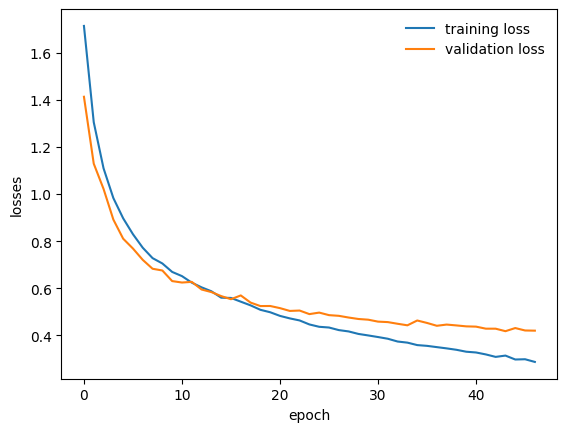

In [13]:
plt.plot(x_axis,train_losses,label="training loss")
plt.plot(x_axis,dev_losses,label="validation loss")
plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()

In [14]:
model=model.to("cpu")
torch.save(model.state_dict(),model_file)